In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# import plotly.plotly as py
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("DATA/babs_open_data_year_1/201402_babs_open_data/201402_merged_data.csv", low_memory=False)

In [3]:
df_station = pd.read_csv("DATA/babs_open_data_year_1/201402_babs_open_data/201402_station_data.csv")

In [4]:
df_station

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [123]:
df.columns

Index([u'Trip ID', u'Duration', u'Start Date Time', u'Start Station',
       u'Start Terminal', u'End Date Time', u'End Station', u'End Terminal',
       u'Bike #', u'Subscription Type', u'Zip Code', u'Start Date',
       u'Start Time', u'End Date', u'End Time', u'station_id_x',
       u'Start Latitute', u'Start Longitude', u'Start Station Dockcount',
       u'Start Station Landmark', u'Start Station Installation',
       u'station_id_y', u'End Latitute', u'End Longitude',
       u'End Station Dockcount', u'End Station Landmark',
       u'End Station Installation', u'month', u'day_of_month', u'hour_of_day',
       u'day_of_week', u'weekend'],
      dtype='object')

In [60]:
df.head()

,Trip ID,Duration,Start Date Time,Start Station,Start Terminal,End Date Time,End Station,End Terminal,Bike #,Subscription Type,...,Start Longitude,Start Station Dockcount,Start Station Landmark,Start Station Installation,station_id_y,End Latitute,End Longitude,End Station Dockcount,End Station Landmark,End Station Installation
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,...,-122.418954,19,San Francisco,8/23/2013,66,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,...,-122.418954,19,San Francisco,8/23/2013,66,37.774814,-122.418954,19,San Francisco,8/23/2013
2,5070,168,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,598,Subscriber,...,-122.418954,19,San Francisco,8/23/2013,66,37.774814,-122.418954,19,San Francisco,8/23/2013
3,4584,262,8/29/2013 14:17,South Van Ness at Market,66,8/29/2013 14:21,South Van Ness at Market,66,587,Subscriber,...,-122.418954,19,San Francisco,8/23/2013,66,37.774814,-122.418954,19,San Francisco,8/23/2013
4,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,...,-122.418954,19,San Francisco,8/23/2013,66,37.774814,-122.418954,19,San Francisco,8/23/2013


### Duration

[]

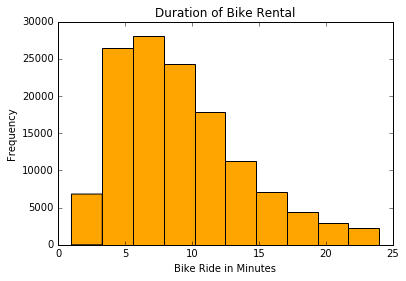

In [9]:
df = df[df['Duration'] < 1440]
df['minutes'] = df['Duration'] /60

plt.hist(df['minutes'], bins = 10, range = (df['minutes'].min(),df['minutes'].max()), color="orange")
plt.title("Duration of Bike Rental")
plt.xlabel("Bike Ride in Minutes")
plt.ylabel("Frequency")

plt.plot()


### Subscription Type

In [89]:
df['Subscription Type'].value_counts()

Subscriber    111913
Customer       19360
dtype: int64

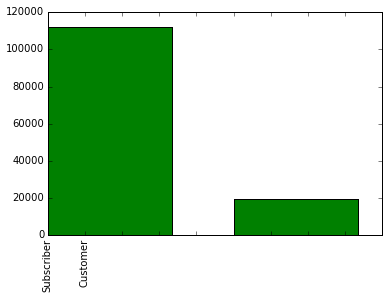

In [119]:
labels = ['Subscriber', 'Customer']
fig, ax = plt.subplots()
y = [df['Subscription Type'].value_counts()[0], df['Subscription Type'].value_counts()[1]]
N = len(y)
x = range(N)
ax.set_xticklabels(labels, rotation='vertical')
width = 1/1.5
plt.bar(x, y, width, color="green")
plt.show()

### Dock Counts

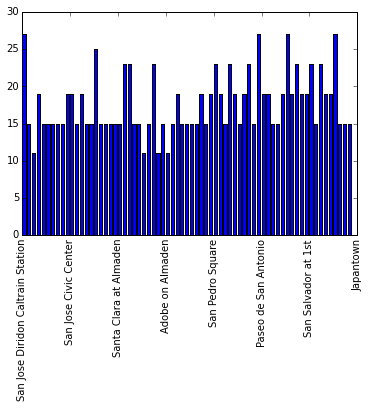

In [127]:
labels = df_station['name'].unique()
fig, ax = plt.subplots()
y = [df_station['dockcount'][i] for i in range(len(df_station))]
N = len(y)
x = range(N)
ax.set_xticklabels(labels, rotation='vertical')
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

### Start Station

In [114]:
df['Start Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         9473
Harry Bridges Plaza (Ferry Building)             5993
Market at Sansome                                5519
Embarcadero at Sansome                           5360
Temporary Transbay Terminal (Howard at Beale)    4959
San Francisco Caltrain 2 (330 Townsend)          4801
2nd at Townsend                                  4662
Steuart at Market                                4537
Market at 4th                                    4472
Townsend at 7th                                  4316
2nd at South Park                                4270
2nd at Folsom                                    3655
Grant Avenue at Columbus Avenue                  3633
Powell Street BART                               3432
South Van Ness at Market                         3318
Spear at Folsom                                  3283
Market at 10th                                   3242
Embarcadero at Bryant                            3127
Howard at 2nd               

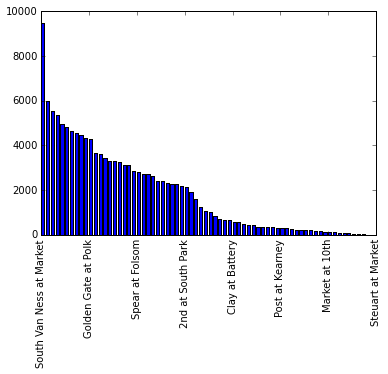

In [105]:
labels = df['Start Station'].unique()
fig, ax = plt.subplots()
y = [df['Start Station'].value_counts()[i] for i in range(len(df['Start Station'].unique()))]
N = len(y)
x = range(N)
ax.set_xticklabels(labels, rotation='vertical')
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

### End Station

In [116]:
df['Start Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         9473
Harry Bridges Plaza (Ferry Building)             5993
Market at Sansome                                5519
Embarcadero at Sansome                           5360
Temporary Transbay Terminal (Howard at Beale)    4959
San Francisco Caltrain 2 (330 Townsend)          4801
2nd at Townsend                                  4662
Steuart at Market                                4537
Market at 4th                                    4472
Townsend at 7th                                  4316
2nd at South Park                                4270
2nd at Folsom                                    3655
Grant Avenue at Columbus Avenue                  3633
Powell Street BART                               3432
South Van Ness at Market                         3318
Spear at Folsom                                  3283
Market at 10th                                   3242
Embarcadero at Bryant                            3127
Howard at 2nd               

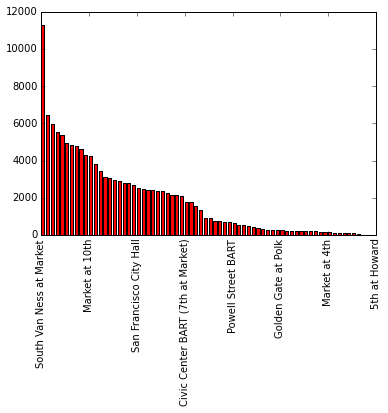

In [115]:
labels = df['End Station'].unique()
fig, ax = plt.subplots()
y = [df['End Station'].value_counts()[i] for i in range(len(df['Start Station'].unique()))]
N = len(y)
x = range(N)
ax.set_xticklabels(labels, rotation='vertical')
width = 1/1.5
plt.bar(x, y, width, color="red")
plt.show()

### Start Zip Code/Lat-Long

### End Zip code/Lat- Long

# New Features

## Start

In [62]:
month =[]
day_of_month =[]
hour_of_day =[]
day_of_week =[]
weekend = []

for i in range(len(df['Start Date Time'].values)):
    date = datetime.strptime(df['Start Date Time'].values[i], "%m/%d/%Y %H:%M")
    moy = date.month
    dom = date.day
    hod = date.hour
    month.append(moy)
    day_of_month.append(dom)
    hour_of_day.append(hod)
    day_of_week.append(date.isoweekday())
    if date.isoweekday() in range(1, 6):
        weekend.append(0)
    else:
        weekend.append(1)
df['month'] = month
df['day_of_month'] = day_of_month
df['hour_of_day'] = hour_of_day
df['day_of_week'] = day_of_week
df['weekend'] = weekend

### Day of the Week

[]

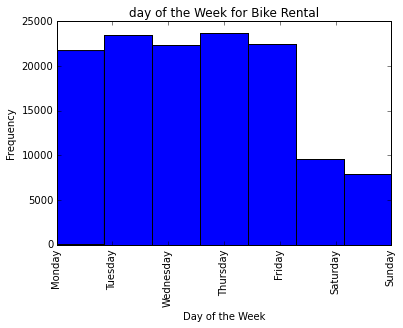

In [77]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots()
plt.hist(df['day_of_week'], bins = 7, range = (df['day_of_week'].min(),df['day_of_week'].max()))
ax.set_xticklabels(labels, rotation='vertical')
plt.title("day of the Week for Bike Rental")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

plt.plot()

### Hour of the Day

[]

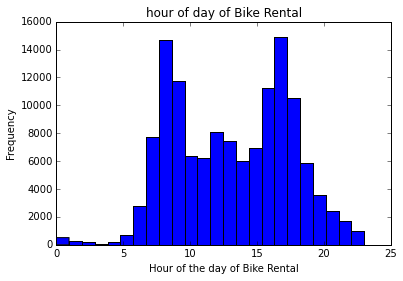

In [79]:
plt.hist(df['hour_of_day'], bins = 24, range = (df['hour_of_day'].min(),df['hour_of_day'].max()))
plt.title("hour of day of Bike Rental")
plt.xlabel("Hour of the day of Bike Rental")
plt.ylabel("Frequency")

plt.plot()

### Month

[]

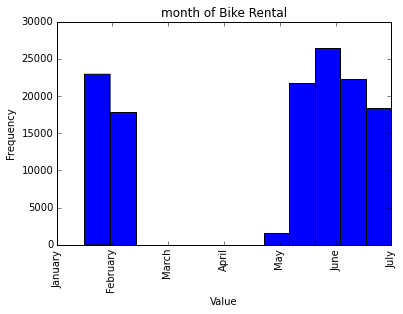

In [83]:
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots()
plt.hist(df['month'], bins = 12, range = (df['month'].min(),df['month'].max()))
ax.set_xticklabels(labels, rotation='vertical')
plt.title("month of Bike Rental")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.plot()

### Weekend/Weekday

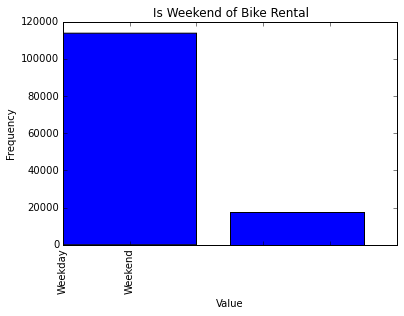

In [104]:
labels = ['Weekday', 'Weekend']
fig, ax = plt.subplots()
plt.hist(df['weekend'],bins = 2, width = .4, range = (df['weekend'].min(),df['weekend'].max()) )
plt.title("Is Weekend of Bike Rental")
ax.set_xticklabels(labels, rotation='vertical')
plt.xlabel("Value")
plt.ylabel("Frequency")

### Distance

## Plot Trips

In [129]:
df['Start Latitute'].max(), df['Start Latitute'].min(), df['Start Longitude'].max(), df['Start Longitude'].min()

(37.80477, 37.329732, -121.877349, -122.418954)

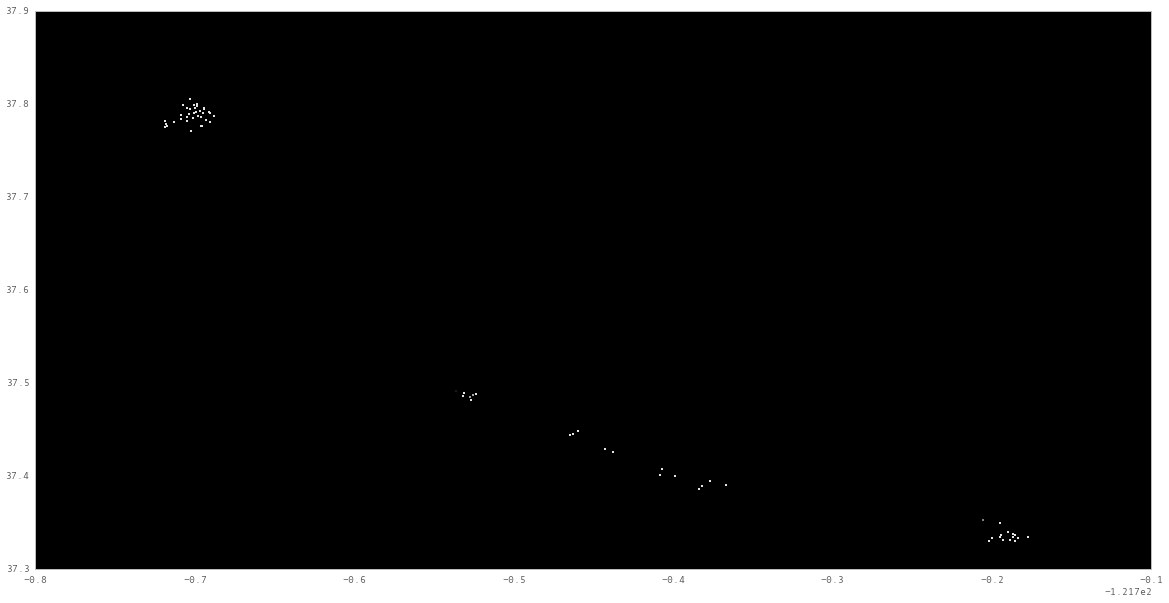

In [137]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
ax.set_axis_bgcolor('black')
plt.scatter( x=df['Start Longitude'], y=df['Start Latitute'], color='white', s=.02,alpha=.6)